# Project 2 README.md
###### By: Armando Acosta

Summary: This project uses NumPy to practice using vectors along with linear and polynomial regression models to compare each model's performance with given training sets.


#### 1. We begin by importing our necessary libraries/frameworks and loading the dataset with NumPy's `load()` method, allowing us to manipulate the data as needed.

In [970]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('boston.npz')


#### 2. We are now going to set aside the first 102 items (20%) to represent as our validation set, leaving the remaining 404 items as our training set.

**NOTE:** We will be separating the data into arrays depending on the file it comes from i.e. features stats (CRIM, ZN, INDUS, etc) in one array and target (MEDV) in another


In [971]:
# Split the array into the proportions we need, in this case the first 102 items
validationFeatures = np.split(data['features'], [0, 102])
validationTarget = np.split(data['target'], [0, 102])
validationFeatures = validationFeatures[1]
validationTarget = validationTarget[1]

# Now split the remaining 404 items into their own arrays
trainingFeatures = np.split(data['features'], [102, 506])
trainingTarget = np.split(data['target'], [102, 506])
trainingFeatures = trainingFeatures[1]
trainingTarget = trainingTarget[1]


#### 3. We can now visualize the relationship between the number of rooms per dwelling against the median value of homes from the training data. We will also determine whether the relationship appears visually linear. This will be done using the `matplotlib.pyplot` framework.

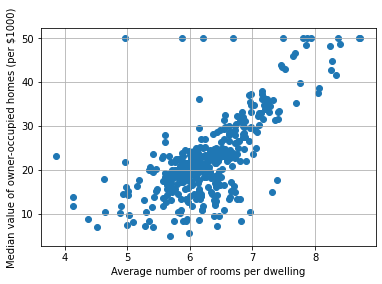

In [972]:
# Split the validation data vertically to get just the RM (room) data
trainingRoomsData = np.hsplit(trainingFeatures, np.array([5, 6]))
trainingRoomsData = trainingRoomsData[1]

plt.scatter(trainingRoomsData, trainingTarget)
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Median value of owner-occupied homes (per $1000)")
plt.grid(True)

plt.show()


After plotting our graph, we see a few discernible patterns, however the most apparent is that this scatterplot leads to a nearly linear pattern for the data set. Especially from the cluster of points at 6 rooms and up, the data tends to trend upward.

---
#### 4. Now, we want to compute our $w$ which refers to the parameters of our model to help plot a least squares fit line for our data. We do this by using the room data (RM) as our $X$ values and the median data (MEDV) as our $t$. Therefore, the equation for MEDV as a linear function of RM can be represented as:

$t_n = w_1x_{n1} + w_2x_{n2} + w_3x_{n3} + ...$

$t = f(x;w_0, w_1) = w_0 + w_1x$

This formula represents the standard equation for the line we will plot. However, we will want the least squares fit to try and get the best fit line that comes as close to as many points as possible. This means that we must figure out what the best parameter values for $w$ are. Given that our data is already in a matrix form, we can use the matrix equation to solve for w which is:

$\widehat{w} = (X^TX)^{-1}X^Tt$


In [973]:
# Create matrix of ones to be stacked on matrix for X for proper calculation
onesMatrix = np.ones_like(trainingRoomsData)
trainingRoomsMatrix = np.hstack((onesMatrix, trainingRoomsData))

# Calculations for (X^T*X)^(-1)
tRoomsTranspose = np.transpose(trainingRoomsMatrix)
tRoomsMult = np.matmul(tRoomsTranspose, trainingRoomsMatrix)
tRoomsMultInv = np.linalg.inv(tRoomsMult)

# Calculations to multiply against X^T*t
trainingTarget = np.vstack(trainingTarget)
tRoomsInvTimesTranspose = np.matmul(tRoomsMultInv, tRoomsTranspose)
w = np.matmul(tRoomsInvTimesTranspose, trainingTarget)

print(w)


[[-34.12731481]
 [  9.03591206]]


After our calculations, we get the matrix representing our $w$ values, with the following:

$w_0 = -34.12731481$

$w_1 = 9.03591206$

And as mentioned, these values will help in determining the equation for MEDV as a linear function of RM.

---
#### 5. Now that we have our $w$ values, we will use our $w$ to plot out our least squares fit line to the previous scatterplot we created.

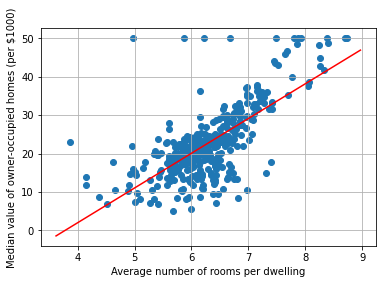

In [974]:
plt.scatter(trainingRoomsData, trainingTarget)
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Median value of owner-occupied homes (per $1000)")
plt.grid(True)

axes = plt.gca()
x_values = np.array(axes.get_xlim())
y_values = w[0] + w[1]*x_values
plt.plot(x_values, y_values, color='red')


Since we plotted our line using our $w$ values, we see that our calculations worked out to plot a least squares fit line against our scatterplot. Visually, the model fits well to represent the linear nature of the training set.

---
#### 6. We will now use our $w$ values to compute our predictions for every value of RM from the training data. This can be done by performing the formula:

$t_{new} = \widehat{w}^Tx_{new}$

Where *new* simply refers to the new piece of data being introduced (in our case, we have all the data, so we will just go down the matrix and form our own prediction matrix).


In [975]:
# Create as list to easily append values, then convert to matrix with np.asarray
predictionMatrix = []

for data in trainingRoomsData:
  target = w[0] + w[1]*data
  predictionMatrix.append(target)
predictionMatrix = np.asarray(predictionMatrix)


With our matrix of prediction values, we can compute the average loss ($\mathcal{L}$) for this model. The formula we will be using is:

$\mathcal{L} = \frac{1}{N}(t-Xw)^T(t-Xw)$


$\\N$: Total number of data points

$\\t$: Prediction matrix

$\\X$: RM values matrix transposed with 1s

$\\w$: Parameter matrix of the model


In [976]:
# First performing Xw, then t - Xw
trainingRMMultParams = np.matmul(trainingRoomsMatrix, w)
targetMinusTrainingRMParams = np.subtract(trainingTarget, trainingRMMultParams)

# Then we multiply (t - Xw)^T and (t - Xw), finally dividing by 404
trainingLoss = (np.matmul(np.transpose(targetMinusTrainingRMParams), targetMinusTrainingRMParams))/404

print('Average loss for training set: ', float(trainingLoss))

Average loss for training set:  41.05654883138219


Thus, our average loss when comparing our prediction and target values for the training set leads to approximately **41.057**.

---
#### 7. We are now going to repeat our work for the previous step, but apply it to our validation set of data instead. We will perform the work first, then discuss after all is finished.


In [977]:
# Set up our matrices for the validation data set
validationRoomsData = np.hsplit(validationFeatures, np.array([5, 6]))
validationRoomsData = validationRoomsData[1]
onesMatrix = np.ones_like(validationRoomsData)
validationRoomsMatrix = np.hstack((onesMatrix, validationRoomsData))

# Calculate w for validation set
vRoomsTranspose = np.transpose(validationRoomsMatrix)
vRoomsMult = np.matmul(vRoomsTranspose, validationRoomsMatrix)
vRoomsMultInv = np.linalg.inv(vRoomsMult)

validationTarget = np.vstack(validationTarget)
vRoomsInvTimesTranspose = np.matmul(vRoomsMultInv, vRoomsTranspose)
validation_w = np.matmul(vRoomsInvTimesTranspose, validationTarget)

# Perform experiment 6 on the validation data
validationPredictMatrix = []
for data in validationRoomsData:
  item = validation_w[0] + validation_w[1]*data
  validationPredictMatrix.append(item)
validationPredictMatrix = np.asarray(validationPredictMatrix)

# Now we predict our loss for the validation
validationRMMultParams = np.matmul(validationRoomsMatrix, validation_w)
vTargetMinusTrainingRMParams = np.subtract(validationTarget, validationRMMultParams)
validationLoss = (np.matmul(np.transpose(vTargetMinusTrainingRMParams), vTargetMinusTrainingRMParams))/102

print('Average loss for validation set: ', float(validationLoss))


Average loss for validation set:  53.30625794995984


With the calculations for the validation set, we get an average loss value of approximately **53.306**.

We can compare our values for the MSE, or the average squared loss, achieved by performing these calculations noted below:

|       |Validation|Training|
|-------|----------|--------|
|**MSE**|53.306    |41.057  |

These outcomes do seem to go with the general trend of how loss values differ between validation and training data sets retrieved in the manner done in this notebook. Since our sample size is smaller for our validation set than our training set, we can conclude that our model for the validation set would be *overfitting*, leading to the higher loss when compared to the training set. In order to fix this issue, a higher number of parameters would assist in "focusing" the data rather than relying on only one feature to attempt to make predictions.

---
#### 8. We will now repeat our experiments from steps 4, 6, and 7, but this time instead of analyzing just the single RM feature of our data, we will use all 13 features to place into our $X$ matrix and study the weights, predictions, and MSE values when using all parameters. We will perform all calculations and discuss data upon arriving at the major aspects.



In [978]:
# First, we compute w for the training set using all the features
onesMatrix = np.ones_like(trainingTarget)
trainingDataMatrix = np.hstack((onesMatrix, trainingFeatures))

allTrainingTranspose = np.transpose(trainingDataMatrix)
allTrainingMult = np.matmul(allTrainingTranspose, trainingDataMatrix)
allTrainingMultInv = np.linalg.inv(allTrainingMult)

allTrainingInvTimesTranspose = np.matmul(allTrainingMultInv, allTrainingTranspose)
all_w = np.matmul(allTrainingInvTimesTranspose, trainingTarget)

print(all_w)


[[ 3.19642409e+01]
 [-1.14552861e-01]
 [ 4.48932130e-02]
 [ 2.83755698e-02]
 [ 2.70909742e+00]
 [-1.67403672e+01]
 [ 4.11148209e+00]
 [-8.47905081e-04]
 [-1.38493905e+00]
 [ 3.21084569e-01]
 [-1.22497115e-02]
 [-9.12523500e-01]
 [ 1.02533638e-02]
 [-4.78414631e-01]]


After obtaining our $w$ values, we see that we have enough to account for all the features and $w_0$. Therefore, the equation for MEDV as a linear function for all the features looks much longer:

$t = f(x;w_0, w_1, w_2, w_3, ...,w_{13}) = w_0 + w_1x_1 + w_2x_2 + w_3x_3 + ... + w_{13}x_{13}$

Now with our $w$ values, we continue onto experiment 6 of finding the prediction values and average loss.


In [979]:
# Create prediction matrix
allTrainingPredictMatrix = []

for data in trainingFeatures:
  target = (all_w[0] + all_w[1]*data[0] + all_w[2]*data[1] + all_w[3]*data[2]
            + all_w[4]*data[3] + all_w[5]*data[4] + all_w[6]*data[5]
            + all_w[7]*data[6] + all_w[8]*data[7] + all_w[9]*data[8]
            + all_w[10]*data[9] + all_w[11]*data[10] + all_w[12]*data[11]
            + all_w[13]*data[12])
  allTrainingPredictMatrix.append(target)
allTrainingPredictMatrix = np.asarray(allTrainingPredictMatrix)

# Compute loss
allTrainingMultParams = np.matmul(trainingDataMatrix, all_w)
targetMinusAllTrainingParams = np.subtract(trainingTarget, allTrainingMultParams)
allTrainingLoss = (np.matmul(np.transpose(targetMinusAllTrainingParams), targetMinusAllTrainingParams))/404

print('Average loss for entire training set: ', float(allTrainingLoss))


Average loss for entire training set:  21.807199582316603


With our calculations, we see that the average loss $\mathcal{L}$ for our training set consisting of all features of the data set results in approximately **21.807**

Note the much lower value when compared to our previous training loss consisting of only one feature.

We will now repeat these processes once more for our validation set comprising all features.


In [980]:
# Set up our matrices for the full validation data set
onesMatrix = np.ones_like(validationTarget)
validationFeaturesMatrix = np.hstack((onesMatrix, validationFeatures))

# Calculate w for full validation set
fullVTranspose = np.transpose(validationFeaturesMatrix)
fullVMult = np.matmul(fullVTranspose, validationFeaturesMatrix)
fullVMultInv = np.linalg.inv(fullVMult)

fullVInvTimesTranspose = np.matmul(fullVMultInv, fullVTranspose)
allv_w = np.matmul(fullVInvTimesTranspose, validationTarget)

# Perform experiment 6 on the full validation data
fullValidationPredictMatrix = []
for data in validationFeatures:
  item = (allv_w[0] + allv_w[1]*data[0] + allv_w[2]*data[1] + allv_w[3]*data[2]
          + allv_w[4]*data[3] + allv_w[5]*data[4] + allv_w[6]*data[5]
          + allv_w[7]*data[6] + allv_w[8]*data[7] + allv_w[9]*data[8]
          + allv_w[10]*data[9] + allv_w[11]*data[10] + allv_w[12]*data[11]
          + allv_w[13]*data[12])
  fullValidationPredictMatrix.append(item)
fullValidationPredictMatrix = np.asarray(fullValidationPredictMatrix)

# Now we predict our loss for the entire validation features
fullValidationMultParams = np.matmul(validationFeaturesMatrix, allv_w)
fullVTargetMinusTrainingParams = np.subtract(validationTarget, fullValidationMultParams)
fullValidationLoss = (np.matmul(np.transpose(fullVTargetMinusTrainingParams), fullVTargetMinusTrainingParams))/102

print('Average loss for entire validation set: ', float(fullValidationLoss))


Average loss for entire validation set:  20.214148879815482


Having completed the loss for the full-featured validation set, we now can look at our complete loss table.

|              |Validation  |Training|
|--------------|:----------:|:------:|
|**MSE (RM)**  |53.306      |41.057  |
|**MSE (Full)**|20.214      |21.807  |

It's immediately apparent here that by applying our full set of features, our loss values drastically decrease. This makes sense, as we would expect a regression model to improve upon having more parameters to base predictions off of. Therefore, a smaller value closer to 0 is exactly what we would want from a model.

However, an interesting note to make is that the new difference between our validation and training sets is flipped, where the former is slightly smaller than the latter. This is a good sign though, since the values are quite near each other. Since we have a slightly lower validation loss, that means we can assume that our model has a *good fit* for our predictions. This is likely due to the fact that, while higher polynomial regressions may lead to larger validation errors, we stuck to a single-order, linear model with ***13*** features to rely on for modeling. These features assist in providing factors to base our predictions off of.

---
#### 9. Before wrapping up our experiments, we will do one last observation. Using the same $w$ values we found in the previous experiment for our full-featured data set, we will grab an arbitray row from the validation set and another row from the training set to test on. For this step, we will attempt to increase each feature by 1 unit (one at a time) and see by how much the predicted median value changes from the original reported median (MEDV) value.


In [981]:
# Extract 5 rows from data sets to test with
validationFeaturesSample = np.split(validationFeatures, [20, 21])
validationFeaturesSample = validationFeaturesSample[1]
validationTargetSample = np.split(validationTarget, [20, 21])
validationTargetSample = validationTargetSample[1]

# Loop through each feature of row to perform tests
featureCount = 0
featureList = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
            'TAX', 'PTRATIO', 'B', 'LSTAT']

for row in validationFeaturesSample:
  for feature in row:
    feature += 1
    row[featureCount] = feature
    prediction = (allv_w[0] + allv_w[1]*row[0] + allv_w[2]*row[1]
                  + allv_w[3]*row[2] + allv_w[4]*row[3] + allv_w[5]*row[4]
                  + allv_w[6]*row[5] + allv_w[7]*row[6] + allv_w[8]*row[7]
                  + allv_w[9]*row[8] + allv_w[10]*row[9] + allv_w[11]*row[10]
                  + allv_w[12]*row[11] + allv_w[13]*row[12])
    print('\nAfter increasing ', featureList[featureCount], ' by one, there is a',
         (float(prediction - validationTargetSample))*1000, 'difference',
         'between the predicted/actual MEDV feature.')
    print('Prediction: $', round(float((prediction))*1000, 2),
         '\nActual: $', int((validationTargetSample)*1000))
  
    feature -= 1
    row[featureCount] = feature
    featureCount += 1



After increasing  CRIM  by one, there is a -13936.301961977122 difference between the predicted/actual MEDV feature.
Prediction: $ 36063.7 
Actual: $ 50000

After increasing  ZN  by one, there is a -13793.686632629673 difference between the predicted/actual MEDV feature.
Prediction: $ 36206.31 
Actual: $ 50000

After increasing  INDUS  by one, there is a -13877.657846793425 difference between the predicted/actual MEDV feature.
Prediction: $ 36122.34 
Actual: $ 50000

After increasing  CHAS  by one, there is a -10418.137774632185 difference between the predicted/actual MEDV feature.
Prediction: $ 39581.86 
Actual: $ 50000

After increasing  NOX  by one, there is a -33490.10591919415 difference between the predicted/actual MEDV feature.
Prediction: $ 16509.89 
Actual: $ 50000

After increasing  RM  by one, there is a -11027.378371487515 difference between the predicted/actual MEDV feature.
Prediction: $ 38972.62 
Actual: $ 50000

After increasing  AGE  by one, there is a -13834.15745157

Those numbers were calculated for the validation data, now we test a row from the training set below.

In [982]:
trainingFeaturesSample = np.split(trainingFeatures, [20, 21])
trainingFeaturesSample = trainingFeaturesSample[1]
trainingTargetSample = np.split(trainingTarget, [20, 21])
trainingTargetSample = trainingTargetSample[1]

featureCount = 0

for row in trainingFeaturesSample:
  for feature in row:
    feature += 1
    row[featureCount] = feature
    prediction = (allv_w[0] + allv_w[1]*row[0] + allv_w[2]*row[1]
                  + allv_w[3]*row[2] + allv_w[4]*row[3] + allv_w[5]*row[4]
                  + allv_w[6]*row[5] + allv_w[7]*row[6] + allv_w[8]*row[7]
                  + allv_w[9]*row[8] + allv_w[10]*row[9] + allv_w[11]*row[10]
                  + allv_w[12]*row[11] + allv_w[13]*row[12])
    print('\nAfter increasing ', featureList[featureCount], ' by one, there is a',
         (float(prediction - trainingTargetSample))*1000, 'difference',
         'between the predicted/actual MEDV feature.')
    print('Prediction: $', round(float((prediction))*1000, 2),
         '\nActual: $', int((trainingTargetSample)*1000))
  
    feature -= 1
    row[featureCount] = feature
    featureCount += 1



After increasing  CRIM  by one, there is a 79.1797376783343 difference between the predicted/actual MEDV feature.
Prediction: $ 27179.18 
Actual: $ 27100

After increasing  ZN  by one, there is a 221.79506702577 difference between the predicted/actual MEDV feature.
Prediction: $ 27321.8 
Actual: $ 27100

After increasing  INDUS  by one, there is a 137.8238528620308 difference between the predicted/actual MEDV feature.
Prediction: $ 27237.82 
Actual: $ 27100

After increasing  CHAS  by one, there is a 3597.343925023257 difference between the predicted/actual MEDV feature.
Prediction: $ 30697.34 
Actual: $ 27100

After increasing  NOX  by one, there is a -19474.624219538702 difference between the predicted/actual MEDV feature.
Prediction: $ 7625.38 
Actual: $ 27100

After increasing  RM  by one, there is a 2988.1033281679415 difference between the predicted/actual MEDV feature.
Prediction: $ 30088.1 
Actual: $ 27100

After increasing  AGE  by one, there is a 181.3242480838433 difference

#### 10. We bring all our work to a close by observing the difference in a house's valuation after manipulating our various features. While our validation data set provides interesting insight, perhaps the training set provides the most valuable insight.

Selecting our Top 3 features with the highest prediction per unit increase, we have the following:

|Feature|Predicted MEDV|Actual MEDV|$ Diff. |% Diff. |
|:------|:------------:|:---------:|:------:|-------:|
|CHAS   |30,697.34     |27,100     |3,597.34|12.45   |
|RM     |30,088.10     |27,100     |2,988.10|10.45   |
|RAD    |27,524.35     |27,100     |424.35  |1.55    |

So, as many may predict, the number of rooms in a house definitely plays a large role in determing the value of a home in the Boston area. However, it surprisingly did not play as large of a role as the CHAS feature did. CHAS is represented as a "dummy variable" in the original data collection, representing the proximity of a house to the Charles River (1 being bounded by the river, 0 is not).


# Summary and Conclusion

With the various experiments and modeling performed, it is safe to conclude that the more features given to work with, the better a prediction can be made to determine a house's pricing. However, it may be a bit too presumptious to claim that the CHAS feature from our data set is the primary indicator of a house's value. Since we only tested a portion of the data and implemented a uniform modification to the features (increase of 1 unit vs. varied increases depending on feature), perhaps it would be best to run more tests to safely make a valuation on Boston's most important feature for house valuation.

Nevertheless, this notebook demonstrates the impressive predictions and valuable insight that linear and polynomial regression modeling may bring to a given collection of data.